##  HW 2 Analysis Problems

<div>
Chase Carlson<br>
GSCM 575 - Machine Learning for Business<br>
The School of Business<br>
Portland State University
<div>

## 1. Data Wrangling, Pre-Processing I

Import datetime

In [113]:
from datetime import datetime as dt
now = dt.now()
print("Analysis on", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M %p"))

Analysis on 2023-07-06 at 11:32 AM


Current working directory

In [171]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

Import packages

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Consider the following csv data file regarding houses and their average selling price in various geographical areas around Boston:

http://web.pdx.edu/~gerbing/data/Boston.csv 

There are 14 variables in the data file, described as follows:

1. crim - per capita crime rate by town
1. zn - proportion of residential land zoned for lots over 25,000 sq.ft.
1. indus - proportion of non-retail business acres per town.
1. chas - charles river dummy variable (1 if tract bounds river; 0 otherwise)
1. nox - nitric oxides concentration (parts per 10 million)
1. rm - average number of rooms per dwelling
1. age - proportion of owner-occupied units built prior to 1940
1. dis - weighted distances to five boston employment centers
1. rad - index of accessibility to radial highways
1. tax - full-value property-tax rate per 10,000 USD
1. ptratio - pupil-teacher ratio by town
1. "b - 1000(bk - 0.63)^2" where bk is the proportion of blacks by town
1. lstat - \% lower status of the population
1. medv - median value of owner-occupied homes in 1000's USD

*a.	Read the data file.*

In [115]:
df = pd.read_csv("http://web.pdx.edu/~gerbing/data/Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The data frame imported with "unnamed column 0". Removing that column...

In [116]:
df = df.drop(columns=df.columns[0]) 
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


*b.	How many examples (rows of data) are there in the data file?*

Check the shape of the data frame

In [117]:
df.shape

(506, 14)

*c.	List the first 5 rows and the variable names.*

In [118]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


*d.	Transform _lstat_ from a percentage to a proportion. Do this by writing the usual equation for this transformation in the language of Pandas, perhaps first writing the expression on paper and then translate to Pandas notation. (Name the new variable anything you wish.) Verify by displaying the first six rows of the revised data frame.*

Divide lstat % by 100 to transform into a proportion

In [119]:
df['lstat_prop'] = df['lstat']/100
df.head(6)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,lstat_prop
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.0498
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0914
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0403
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0294
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0533
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0.0521


*e.	Display just the average number of rooms for the second row of data.*

Use iloc to find the single value from row 2 of 'rm' column.

In [120]:
df['rm'].iloc[1:2]

1    6.421
Name: rm, dtype: float64

*f.	To build a model to forecast median house price, analysts wish to focus on three predictor variables: crim, rm, and rad. Display the first five rows of data for just these three variables.*  
*i. by specifying the variable names*  
*ii. by specifying the variable indices*

Filter the first five rows of crim, rm, and rad using filter().

In [121]:
df2 = df.filter(['crim', 'rm', 'rad'])
df2.head()

,crim,rm,rad
0,0.00632,6.575,1
1,0.02731,6.421,2
2,0.02729,7.185,2
3,0.03237,6.998,3
4,0.06905,7.147,3


Same thing using loc() 

In [122]:
df2 = df.loc[:, ['crim', 'rm', 'rad']]
df2.head()

,crim,rm,rad
0,0.00632,6.575,1
1,0.02731,6.421,2
2,0.02729,7.185,2
3,0.03237,6.998,3
4,0.06905,7.147,3


Filter the first five rows of crim, rm, and rad by specifying the variable indices

In [123]:
df2 = df.iloc[:, [0, 5, 8]]
df2.head()

,crim,rm,rad
0,0.00632,6.575,1
1,0.02731,6.421,2
2,0.02729,7.185,2
3,0.03237,6.998,3
4,0.06905,7.147,3


*g. List all the rows of data with the median value of the home less than \$8000.*

Filter all values in medv column less than 8 (in 1000s)

In [124]:
df.query('medv < 8') 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,lstat_prop
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81,7.2,0.3081
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4,0.3199
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0,0.3059
399,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3,0.2997
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6,0.2677
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32,7.2,0.2032
405,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0,0.2298
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0,0.3698
415,18.08460,0.0,18.10,0,0.679,6.434,100.0,1.8347,24,666,20.2,27.25,29.05,7.2,0.2905
416,10.83420,0.0,18.10,0,0.679,6.782,90.8,1.8195,24,666,20.2,21.57,25.79,7.5,0.2579


*h.	Use code (i.e., do not manually count) to display the number of homes with median value < $8000.*

Count the number of homes with median value < 8

In [125]:
homes = df.query('medv < 8')['medv'].count()
print("Number of homes with medv < $8000: ", (homes))

Number of homes with medv < $8000:  11


*i.	Analysts want to build a model to forecast the median value of a house. Construct the box plot of the corresponding variable medv.*

[Text(0.5, 0, 'Median Value of Owner-Occupied Homes')]

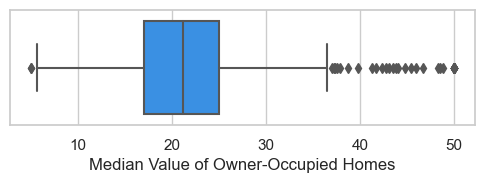

In [169]:
# Set plot theme
sns.set_theme(style='whitegrid')

# Use seaborn to create boxplot for the variable medv
plot = sns.boxplot(x=df['medv'], color='dodgerblue')

# Resize the figure
sns.set(rc={'figure.figsize': (6, 1.5)})

# Addd axis label
plot.set(xlabel='Median Value of Owner-Occupied Homes')

*j.	Describe the distribution of medv from the box plot including any outliers.*

The data within the medv column is highly dispersed, with a range from 5-50. The mean is 22.53 and the median is 21.2. The middle 50% of values lie between 17 and 25, and the standard deviation is just over 9. There are a number of potential outliers with high values that skew the data to the right, and there is at least one potential outlier at the bottom end of the range. 

In [127]:
round(df.describe()['medv'], 2)


count    506.00
mean      22.53
std        9.20
min        5.00
25%       17.02
50%       21.20
75%       25.00
max       50.00
Name: medv, dtype: float64

*k.	For the three predictor variables of interest, rescale into a data object called X three ways, each time showing the first five rows of rescaled data.*  
*i. MinMax, and also show the minimum and maximum of the rescaled variables*  
*ii. Standardize, and also show the mean and standard deviation of the rescaled variables and comment on their respective sizes*  
*iii. Robust Scale*

#### Pre-processing

Import sklearn preprocessing module

In [128]:
from sklearn import preprocessing

View data types of predictor variables.

In [129]:
df[['crim', 'rm', 'rad']].dtypes 

crim    float64
rm      float64
rad       int64
dtype: object

Subset the predictor variables (crim, rm, & rad) into their own data frame and update 'rad' to float64

In [130]:
X = df[['crim', 'rm', 'rad']].copy()
X.loc[:, 'rad'] = X.loc[:, 'rad'].astype('Float64') 
X.head()

,crim,rm,rad
0,0.00632,6.575,1.0
1,0.02731,6.421,2.0
2,0.02729,7.185,2.0
3,0.03237,6.998,3.0
4,0.06905,7.147,3.0


##### i. Scale using MinMax

Import MinMax Scaler and create mm_scaler instance

In [131]:
from sklearn.preprocessing import MinMaxScaler 
mm_scaler = preprocessing.MinMaxScaler() 

Transform X using MinMaxScaler and view object type

In [132]:
Xmm = mm_scaler.fit_transform(X)
type(Xmm)


numpy.ndarray

Transform Xmm into a data frame and view first 5 rows

In [133]:
Xmm = pd.DataFrame(Xmm, columns=['crim', 'rm', 'rad'])
Xmm.head()

,crim,rm,rad
0,0.000000,0.577505,0.000000
1,0.000236,0.547998,0.043478
2,0.000236,0.694386,0.043478
3,0.000293,0.658555,0.086957
4,0.000705,0.687105,0.086957


View Min values

In [134]:
Xmm.min()

crim    0.0
rm      0.0
rad     0.0
dtype: float64

View Max values

In [135]:
Xmm.max()

crim    1.0
rm      1.0
rad     1.0
dtype: float64

#### ii. Scale using Standardization

Import StandardScaler module and create instance

In [136]:
from sklearn.preprocessing import StandardScaler
s_scaler = preprocessing.StandardScaler() 

Transform using Standard Scaler and convert back to data frame

In [137]:
Xst = s_scaler.fit_transform(X)
Xst = pd.DataFrame(Xst, columns=['crim', 'rm', 'rad']) 
Xst.head()

,crim,rm,rad
0,-0.419782,0.413672,-0.982843
1,-0.417339,0.194274,-0.867883
2,-0.417342,1.282714,-0.867883
3,-0.416750,1.016303,-0.752922
4,-0.412482,1.228577,-0.752922


View the mean

In [138]:
round(Xst.mean(), 4)

crim   -0.0
rm     -0.0
rad    -0.0
dtype: float64

View standard deviation

In [139]:
round(Xst.std(), 4)

crim    1.001
rm      1.001
rad     1.001
dtype: float64

The mean of 0 and standard deviation of 1 represents a normal distribution of data. This ensures that the distribution of the data points is similar across different variables.

#### iii. Robust Scale

Import RobustScaler module and create instance

In [140]:
from sklearn.preprocessing import RobustScaler
r_scaler = preprocessing.RobustScaler()

Transform X using RobustScaler and convert back to data frame

In [141]:
Xrb = r_scaler.fit_transform(X)
Xrb = pd.DataFrame(Xrb, columns=['crim', 'rm', 'rad']) 
Xrb.head()

,crim,rm,rad
0,-0.069593,0.496612,-0.20
1,-0.063755,0.287940,-0.15
2,-0.063760,1.323171,-0.15
3,-0.062347,1.069783,-0.10
4,-0.052144,1.271680,-0.10


View the mean

In [142]:
round(Xrb.mean(), 4)

crim    0.9338
rm      0.1032
rad     0.2275
dtype: float64

View the standard deviation

In [143]:
round(Xrb.std(), 4)

crim    2.3926
rm      0.9521
rad     0.4354
dtype: float64

View min

In [144]:
round(Xrb.min(), 4)

crim   -0.0696
rm     -3.5874
rad    -0.2000
dtype: float64

View max

In [145]:
round(Xrb.max(), 4)

crim    24.6784
rm       3.4844
rad      0.9500
dtype: float64

## 2.	Data Wrangling, Pre-Processing II 

Data: http://web.pdx.edu/~gerbing/data/SupermarketTransactions.xlsx (sample data from Tableau)

Read in the data

In [146]:
supermarket = pd.read_excel('http://web.pdx.edu/~gerbing/data/SupermarketTransactions.xlsx')
supermarket.head()

,Transaction,Purchase,Customer,Gender,Marital,Homeowner,Children,Income,City,State,Country,Family,Dept,Category,Units_Sold,Revenue
0,1,2015-12-17,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2015-12-19,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
2,3,2015-12-20,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2015-12-20,9619,M,M,Y,3,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
4,5,2015-12-21,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00


a.	_How many examples, rows of data? Columns of data?_

View the shape of the data frame

In [147]:
supermarket.shape

(14059, 16)

b.	_Convert the value of Country, USA, to USofA. Verify. (Always verify the data after a transformation.)_

Replace USA with USofA targeting the 'Country' column

In [148]:
supermarket = supermarket.replace({'Country': {'USA': 'USofA'}})
supermarket.head()

,Transaction,Purchase,Customer,Gender,Marital,Homeowner,Children,Income,City,State,Country,Family,Dept,Category,Units_Sold,Revenue
0,1,2015-12-17,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USofA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2015-12-19,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USofA,Food,Produce,Vegetables,5,14.90
2,3,2015-12-20,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USofA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2015-12-20,9619,M,M,Y,3,$30K - $50K,Portland,OR,USofA,Food,Snacks,Candy,4,4.44
4,5,2015-12-21,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USofA,Drink,Beverages,Carbonated Beverages,4,14.00


c. _Identify the three countries in the data for the cateogrical variable Country._

Finding unique values for Country. Countries include USofA, Mexico, and Canada

In [149]:
supermarket['Country'].unique()

array(['USofA', 'Mexico', 'Canada'], dtype=object)

d.	_Sales took place in three countries.  Convert the categorical variable Country to dummy variables for later numerical processing. What country gets dropped in the conversion?_

Use pd.get_dummies to create dummy variables for Country. Canada gets dropped because it is alphabetically first.

In [150]:
supermarket = pd.get_dummies(supermarket, columns=['Country'], drop_first=True)
supermarket.head()

,Transaction,Purchase,Customer,Gender,Marital,Homeowner,Children,Income,City,State,Family,Dept,Category,Units_Sold,Revenue,Country_Mexico,Country_USofA
0,1,2015-12-17,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,Food,Snack Foods,Snack Foods,5,27.38,0,1
1,2,2015-12-19,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,Food,Produce,Vegetables,5,14.90,0,1
2,3,2015-12-20,8374,F,M,N,2,$50K - $70K,Bremerton,WA,Food,Snack Foods,Snack Foods,3,5.52,0,1
3,4,2015-12-20,9619,M,M,Y,3,$30K - $50K,Portland,OR,Food,Snacks,Candy,4,4.44,0,1
4,5,2015-12-21,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,Drink,Beverages,Carbonated Beverages,4,14.00,0,1


## 3. Missing Data

Data:  http://web.pdx.edu/~gerbing/data/employee.xlsx

Read in the data

In [151]:
emp = pd.read_excel('http://web.pdx.edu/~gerbing/data/employee.xlsx')
emp.head()

,Name,Years,Gender,Dept,Salary,JobSat,Plan,Pre,Post
0,"Ritchie, Darnell",7.0,M,ADMN,53788.26,med,1,82,92
1,"Wu, James",NaN,M,SALE,94494.58,low,1,62,74
2,"Hoang, Binh",15.0,M,SALE,111074.86,low,3,96,97
3,"Jones, Alissa",5.0,W,NaN,53772.58,NaN,1,65,62
4,"Downs, Deborah",7.0,W,FINC,57139.90,high,2,90,86


*a.	How many examples (rows of data) are there in the data file?*

View the shape of the data frame

In [152]:
emp.shape

(37, 9)

*b.	Display rows of data that include the row of data with the missing data.*

In [153]:
emp[emp.isna().any(axis='columns')]

,Name,Years,Gender,Dept,Salary,JobSat,Plan,Pre,Post
1,"Wu, James",NaN,M,SALE,94494.58,low,1,62,74
3,"Jones, Alissa",5.0,W,NaN,53772.58,NaN,1,65,62
30,"Korhalkar, Jessica",2.0,W,ACCT,72502.50,NaN,2,74,87


*c.	Impute the median for the missing data of Years employed at the company. (Verify, as always.)*

Isolate the variable 'Years'

In [154]:
X = emp.filter(['Years'])
X.head()

,Years
0,7.0
1,NaN
2,15.0
3,5.0
4,7.0


Import SimpleImputer and create instance

In [155]:
from sklearn.impute import SimpleImputer
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')

Fit to isolated variable and execute transformation

In [156]:
imp_med = imp_med.fit(X)
X = imp_med.transform(X) 

Update data frame with missing values and verify result

In [157]:
emp['Years'] = X 
emp.head()

,Name,Years,Gender,Dept,Salary,JobSat,Plan,Pre,Post
0,"Ritchie, Darnell",7.0,M,ADMN,53788.26,med,1,82,92
1,"Wu, James",9.0,M,SALE,94494.58,low,1,62,74
2,"Hoang, Binh",15.0,M,SALE,111074.86,low,3,96,97
3,"Jones, Alissa",5.0,W,NaN,53772.58,NaN,1,65,62
4,"Downs, Deborah",7.0,W,FINC,57139.90,high,2,90,86


*d.	Display rows of data that include the row of data with the imputed data to verify that the missing data has been properly imputed to show the change from missing to the imputed median for each variable.*

Display updated row for James Wu by targeting iloc

In [158]:
emp.iloc[1]

Name      Wu, James
Years           9.0
Gender            M
Dept           SALE
Salary     94494.58
JobSat          low
Plan              1
Pre              62
Post             74
Name: 1, dtype: object

View multiple rows that includes the updated value

In [159]:
emp.head()

,Name,Years,Gender,Dept,Salary,JobSat,Plan,Pre,Post
0,"Ritchie, Darnell",7.0,M,ADMN,53788.26,med,1,82,92
1,"Wu, James",9.0,M,SALE,94494.58,low,1,62,74
2,"Hoang, Binh",15.0,M,SALE,111074.86,low,3,96,97
3,"Jones, Alissa",5.0,W,NaN,53772.58,NaN,1,65,62
4,"Downs, Deborah",7.0,W,FINC,57139.90,high,2,90,86
